Analyzing encrypted file: /Users/bodapati/Documents/encrypted_data.csv

=== Pattern Analysis ===
Total blocks: 372801
Unique blocks: 372801
Repeated blocks: 0
No repeated blocks detected.

=== Length Leakage Check ===
Ciphertext length: 5964816
Ciphertext length aligns with block size.

=== Entropy Test ===
Shannon Entropy: 8.0000 (Max: 8.0000)
Ciphertext appears random.


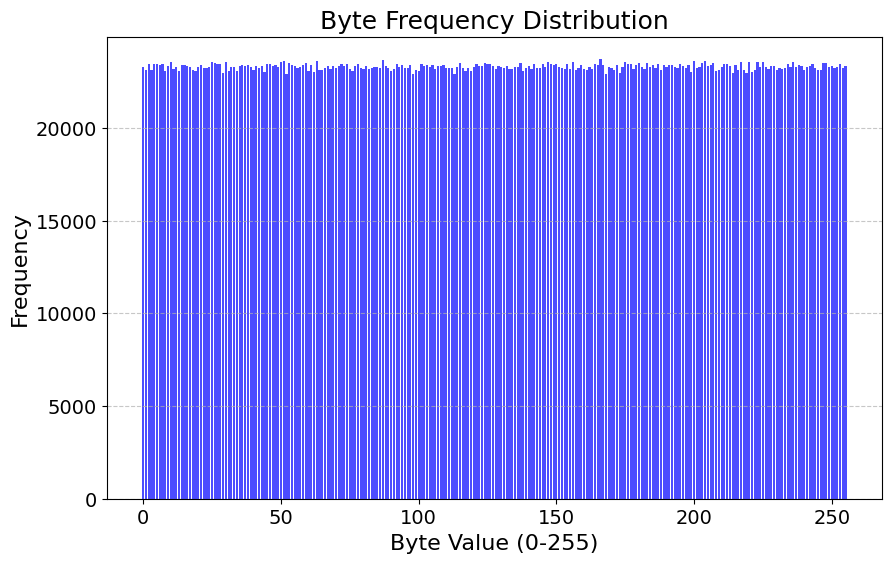


=== Chi-Square Test ===
Chi-Square Statistic: 253.4022, p-value: 0.5165
Ciphertext byte distribution appears uniform.


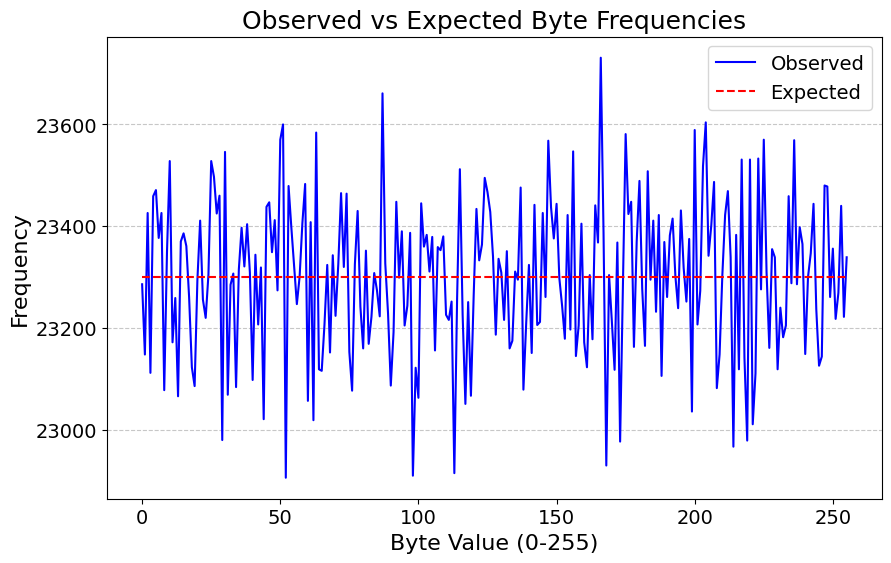

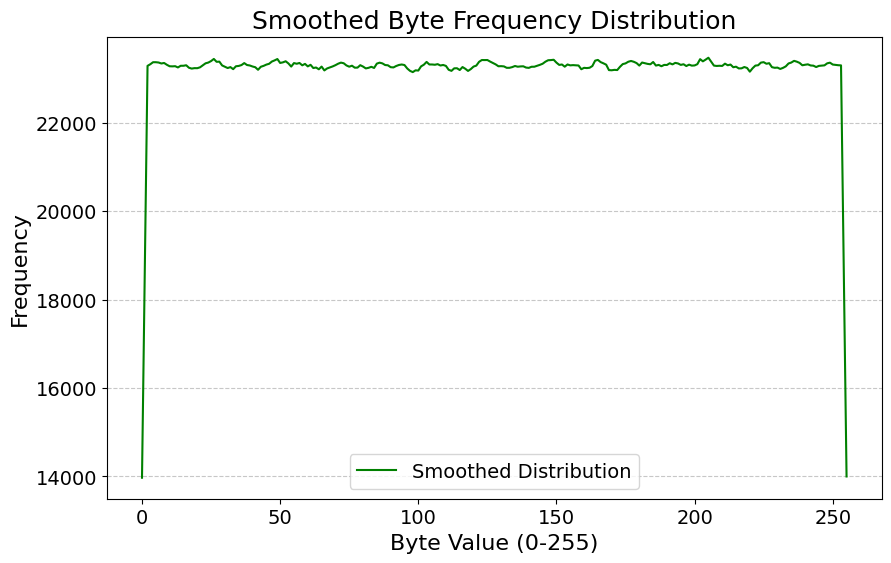

In [1]:
import os
import math
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chisquare

# Set global font size for matplotlib
plt.rcParams.update({'font.size': 14})  # Default font size increased to 14

# Function to analyze patterns in the ciphertext
def analyze_patterns(ciphertext):
    block_size = 16  # AES block size
    blocks = [ciphertext[i:i + block_size] for i in range(0, len(ciphertext), block_size)]
    unique_blocks = set(blocks)
    repetition_count = len(blocks) - len(unique_blocks)

    print(f"=== Pattern Analysis ===")
    print(f"Total blocks: {len(blocks)}")
    print(f"Unique blocks: {len(unique_blocks)}")
    print(f"Repeated blocks: {repetition_count}")

    if repetition_count > 0:
        print("Pattern detected: Repeated blocks found!")
    else:
        print("No repeated blocks detected.")

# Function to check length leakage
def check_length_leakage(ciphertext, block_size=16):
    ciphertext_length = len(ciphertext)
    print(f"\n=== Length Leakage Check ===")
    print(f"Ciphertext length: {ciphertext_length}")
    if ciphertext_length % block_size != 0:
        print("Warning: Ciphertext length is not a multiple of block size!")
    else:
        print("Ciphertext length aligns with block size.")

# Function to calculate Shannon entropy
def calculate_entropy(data):
    counter = Counter(data)
    total_length = len(data)
    entropy = -sum((count / total_length) * math.log2(count / total_length) for count in counter.values())
    return entropy

# Function to test entropy and plot distribution
def test_entropy(ciphertext):
    entropy = calculate_entropy(ciphertext)
    print(f"\n=== Entropy Test ===")
    print(f"Shannon Entropy: {entropy:.4f} (Max: {math.log2(256):.4f})")

    if entropy < 7.8:
        print("Warning: Ciphertext may not be sufficiently random!")
    else:
        print("Ciphertext appears random.")

    # Plotting byte frequency distribution
    byte_counts = Counter(ciphertext)
    byte_values = list(range(256))
    frequencies = [byte_counts[byte] for byte in byte_values]

    plt.figure(figsize=(10, 6))
    plt.bar(byte_values, frequencies, color="blue", alpha=0.7)
    plt.title("Byte Frequency Distribution", fontsize=18)  # Increased title font size
    plt.xlabel("Byte Value (0-255)", fontsize=16)  # Increased x-label font size
    plt.ylabel("Frequency", fontsize=16)  # Increased y-label font size
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

# Function to perform chi-square test
def chi_square_test(ciphertext):
    byte_counts = [0] * 256
    for byte in ciphertext:
        byte_counts[byte] += 1

    expected = [len(ciphertext) / 256] * 256
    chi2, p = chisquare(byte_counts, expected)
    print(f"\n=== Chi-Square Test ===")
    print(f"Chi-Square Statistic: {chi2:.4f}, p-value: {p:.4f}")

    if p < 0.05:
        print("Warning: Ciphertext byte distribution is not uniform!")
    else:
        print("Ciphertext byte distribution appears uniform.")

    # Plotting observed vs. expected frequencies
    plt.figure(figsize=(10, 6))
    plt.plot(byte_counts, label="Observed", color="blue")
    plt.plot(expected, label="Expected", color="red", linestyle="--")
    plt.title("Observed vs Expected Byte Frequencies", fontsize=18)
    plt.xlabel("Byte Value (0-255)", fontsize=16)
    plt.ylabel("Frequency", fontsize=16)
    plt.legend(fontsize=14)  # Increased legend font size
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

# Function to plot smoothed frequency distribution
def plot_smoothed_distribution(ciphertext):
    byte_counts = Counter(ciphertext)
    byte_values = np.array(list(range(256)))
    frequencies = np.array([byte_counts[byte] for byte in byte_values])

    # Applying a smoothing kernel
    smoothed_frequencies = np.convolve(frequencies, np.ones(5)/5, mode="same")

    plt.figure(figsize=(10, 6))
    plt.plot(byte_values, smoothed_frequencies, color="green", label="Smoothed Distribution")
    plt.title("Smoothed Byte Frequency Distribution", fontsize=18)
    plt.xlabel("Byte Value (0-255)", fontsize=16)
    plt.ylabel("Frequency", fontsize=16)
    plt.legend(fontsize=14)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

# Function to perform all COA checks and generate visualizations
def perform_coa_checks(encrypted_file_path):
    if not os.path.exists(encrypted_file_path):
        print(f"Error: File not found at {encrypted_file_path}")
        return

    with open(encrypted_file_path, 'rb') as f:
        ciphertext = f.read()

    print(f"Analyzing encrypted file: {encrypted_file_path}\n")
    analyze_patterns(ciphertext)
    check_length_leakage(ciphertext)
    test_entropy(ciphertext)
    chi_square_test(ciphertext)
    plot_smoothed_distribution(ciphertext)

if __name__ == "__main__":
    # Directly specify the path to your encrypted file here
    encrypted_file_path =  "/Users/bodapati/Documents/encrypted_data.csv"  
    perform_coa_checks(encrypted_file_path)